# Feature Engineering

In [184]:
# importing libraries
import numpy as np
import pandas as pd
import re

In [185]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [186]:
df = pd.read_csv('/content/gurgaon_properties_cleaned_v1.csv')

In [187]:
df.duplicated().sum()

np.int64(122)

In [188]:
df.head(3)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet area: 650 sq.ft. (60.39 sq.m.),3,2,2,not available,2.0,NaN,0 to 1 Year Old,"['Sector 55-56 Metro Station', 'The Leaf Mall Sohna', 'Omaxe Gurgaon Mall', 'Badshahpur Sohna Rd Hwy', 'Vidya Niketan School', 'KIIT College of Engg', 'Scottish High International School', 'Rawal Institutions', 'Park Hospital', 'Indira Gandhi Intl Airport', 'Spaze Business Park', 'DLF Cyber City']",NaN,"['Lift(s)', 'Park']"
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,"study room,servant room",4.0,NaN,Within 6 months,"['Sant Soordas Sihi Metro Station', 'Airia Mall', 'Dwarka Expressway', 'Pataudi Road', 'NH-8', 'KMP Expressway', 'RPS International School', 'Genesis Hospital Sector 84', 'Gurgaon Railway Station', 'Vatika Business Park Sector 49', 'Holiday Inn Gurugram Sector 90', 'De Adventure Amusement Park', 'National Tennis Academy Sector 98', 'IMT Manesar']",NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Piped-gas', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Club house / Community Center']"
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,not available,0.0,NaN,Under Construction,"['V3S Sapphire Ninety Mall', 'Sector 86 Road', 'Dwarka Expy', 'RPS International School', 'SGT University', 'Shree Radhey Hospital And Trauma Center', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction']",[],"['Intercom Facility', 'Lift(s)', 'Park']"


### We will focus on below columns
1. areaWithType
2. additionalRoom
3. agePossession
4. furnishDetails
5. features

## 1. areaWithType

In [189]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
2506,1.35,3500.0,Built Up area: 3500 (325.16 sq.m.)Carpet area: 2500 sq.ft. (232.26 sq.m.)
3169,1.75,1395.0,Super Built up area 1395(129.6 sq.m.)Carpet area: 809 sq.ft. (75.16 sq.m.)
3326,1.90,1929.0,Carpet area: 1929 (179.21 sq.m.)
103,3.65,2395.0,Super Built up area 1870(173.73 sq.m.)Built Up area: 1869 sq.ft. (173.64 sq.m.)
1468,2.70,2305.0,Super Built up area 2305(214.14 sq.m.)Built Up area: 2000 sq.ft. (185.81 sq.m.)Carpet area: 1700 sq.ft. (157.94 sq.m.)


In [190]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [191]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [192]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [193]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

In [194]:
# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)


In [195]:
# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [196]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
1450,0.40,house,500.0,Built Up area: 500 (46.45 sq.m.)Carpet area: 300 sq.ft. (27.87 sq.m.),NaN,500.0,300.0
1484,5.50,flat,3025.0,Super Built up area 3025(281.03 sq.m.),3025.0,NaN,NaN
2727,3.67,flat,2040.0,Super Built up area 2040(189.52 sq.m.),2040.0,NaN,NaN
1800,2.00,flat,1370.0,Super Built up area 1370(127.28 sq.m.),1370.0,NaN,NaN
3449,8.00,house,300.0,Plot area 300(27.87 sq.m.),NaN,NaN,NaN


In [197]:
df.duplicated().sum()

np.int64(122)

In [198]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [199]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
9,1.2,house,1186.0,Plot area 1185.51(110.14 sq.m.),NaN,NaN,NaN
10,4.5,house,1350.0,Plot area 150(125.42 sq.m.),NaN,NaN,NaN
15,1.2,house,846.0,Plot area 846(78.6 sq.m.)Built Up area: 846 sq.ft. (78.6 sq.m.),NaN,846.0,NaN
19,5.5,house,1440.0,Plot area 160(133.78 sq.m.),NaN,NaN,NaN
25,9.0,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN


In [200]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,18
price_per_sqft,18
area,18
areaWithType,0
bedRoom,0
bathroom,0
balcony,0


In [201]:
# dataframe having super_built_up_aream and built_up_area and carpet_area is null (together)
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [202]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
9,1.2,house,1186.0,Plot area 1185.51(110.14 sq.m.),NaN,NaN,NaN
10,4.5,house,1350.0,Plot area 150(125.42 sq.m.),NaN,NaN,NaN
19,5.5,house,1440.0,Plot area 160(133.78 sq.m.),NaN,NaN,NaN
25,9.0,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
26,7.0,house,2475.0,Plot area 275(229.94 sq.m.),NaN,NaN,NaN


### these nan dataframe belongs to plot area

In [203]:
# saved its index
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [204]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [205]:
# Since plot are similar to builtup area (google)
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

In [206]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
9,1.2,house,1186.0,Plot area 1185.51(110.14 sq.m.),NaN,1185.51,NaN
10,4.5,house,1350.0,Plot area 150(125.42 sq.m.),NaN,150.00,NaN
19,5.5,house,1440.0,Plot area 160(133.78 sq.m.),NaN,160.00,NaN
25,9.0,house,3240.0,Plot area 360(301.01 sq.m.),NaN,360.00,NaN
26,7.0,house,2475.0,Plot area 275(229.94 sq.m.),NaN,275.00,NaN


### To convert square yards and square meters into square feet, we can use the following conversion factors:

- Square Yards to Square Feet:

     ```1 square yard = 9 square feet ```

- Square Meters to Square Feet:

   ```1 square meter = 10.7639 square feet```

In [207]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [208]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [209]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
9,1.2,house,1186.0,Plot area 1185.51(110.14 sq.m.),NaN,1185.51,NaN
10,4.5,house,1350.0,Plot area 150(125.42 sq.m.),NaN,1350.00,NaN
19,5.5,house,1440.0,Plot area 160(133.78 sq.m.),NaN,1440.00,NaN
25,9.0,house,3240.0,Plot area 360(301.01 sq.m.),NaN,3240.00,NaN
26,7.0,house,2475.0,Plot area 275(229.94 sq.m.),NaN,2475.00,NaN


In [210]:
# update the original dataframe
df.update(all_nan_df)

In [211]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,18
price_per_sqft,18
area,18
areaWithType,0
bedRoom,0
bathroom,0
balcony,0


In [212]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet area: 650 sq.ft. (60.39 sq.m.),3,2,2,not available,2.0,NaN,0 to 1 Year Old,"['Sector 55-56 Metro Station', 'The Leaf Mall Sohna', 'Omaxe Gurgaon Mall', 'Badshahpur Sohna Rd Hwy', 'Vidya Niketan School', 'KIIT College of Engg', 'Scottish High International School', 'Rawal Institutions', 'Park Hospital', 'Indira Gandhi Intl Airport', 'Spaze Business Park', 'DLF Cyber City']",NaN,"['Lift(s)', 'Park']",1081.0,NaN,650.0
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,"study room,servant room",4.0,NaN,Within 6 months,"['Sant Soordas Sihi Metro Station', 'Airia Mall', 'Dwarka Expressway', 'Pataudi Road', 'NH-8', 'KMP Expressway', 'RPS International School', 'Genesis Hospital Sector 84', 'Gurgaon Railway Station', 'Vatika Business Park Sector 49', 'Holiday Inn Gurugram Sector 90', 'De Adventure Amusement Park', 'National Tennis Academy Sector 98', 'IMT Manesar']",NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Piped-gas', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,NaN,1103.0
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,not available,0.0,NaN,Under Construction,"['V3S Sapphire Ninety Mall', 'Sector 86 Road', 'Dwarka Expy', 'RPS International School', 'SGT University', 'Shree Radhey Hospital And Trauma Center', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction']",[],"['Intercom Facility', 'Lift(s)', 'Park']",NaN,NaN,58141.0
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 585 sq.ft. (54.35 sq.m.),2,2,1,not available,17.0,NaN,0 to 1 Year Old,"['Huda City Centre', 'Omaxe City Centre', 'Ninex City Mart', 'Vaels Ravindra Bharathi Global School', 'Anjali nursery', 'Polaris Hospital', 'Axis Bank', 'Triangular Park', 'Flow Sports Life Badminton Club', 'Basai Dhankot Railway Station', 'Cars24', 'Radisson Hotel Gurugram', ""McDonald's"", 'Petrol Pump', 'Indian Post Office']",[],"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",NaN,1000.0,585.0
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up area: 1615 sq.ft. (150.04 sq.m.)Carpet area: 1476 sq.ft. (137.12 sq.m.),3,4,3+,"servant room,others",10.0,North-West,1 to 5 Year Old,"['Sapphire 93 Mall', 'Dwarka Expressway', 'NH-8, Imt Manesar', 'Western Peripheral Expressway', 'RPS International School Sector 89', 'DPG Institute of Technology', 'Aarvy Healthcare Hospital', 'Indira Gandhi International Airport', 'Holiday Inn Sector 90', 'De Adventure Park', 'National Tennis Academy Sector 98']","['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '3 Geyser', '15 Light', '5 AC', '1 Chimney', '4 Curtains', '1 Modular Kitchen', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM'

## 2.additionalRoom

In [213]:
df['additionalRoom'].value_counts()

,count
additionalRoom,
not available,1587
servant room,705
study room,250
others,225
pooja room,165
store room,99
"study room,servant room",99
"pooja room,servant room",82
"pooja room,study room,servant room,store room",72


In [214]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [215]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
3153,not available,0,0,0,0,0
1108,not available,0,0,0,0,0
2438,study room,1,0,0,0,0
2782,servant room,0,1,0,0,0
848,not available,0,0,0,0,0


In [216]:
df.head(3)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet area: 650 sq.ft. (60.39 sq.m.),3,2,2,not available,2.0,NaN,0 to 1 Year Old,"['Sector 55-56 Metro Station', 'The Leaf Mall Sohna', 'Omaxe Gurgaon Mall', 'Badshahpur Sohna Rd Hwy', 'Vidya Niketan School', 'KIIT College of Engg', 'Scottish High International School', 'Rawal Institutions', 'Park Hospital', 'Indira Gandhi Intl Airport', 'Spaze Business Park', 'DLF Cyber City']",NaN,"['Lift(s)', 'Park']",1081.0,NaN,650.0,0,0,0,0,0
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,"study room,servant room",4.0,NaN,Within 6 months,"['Sant Soordas Sihi Metro Station', 'Airia Mall', 'Dwarka Expressway', 'Pataudi Road', 'NH-8', 'KMP Expressway', 'RPS International School', 'Genesis Hospital Sector 84', 'Gurgaon Railway Station', 'Vatika Business Park Sector 49', 'Holiday Inn Gurugram Sector 90', 'De Adventure Amusement Park', 'National Tennis Academy Sector 98', 'IMT Manesar']",NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Piped-gas', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,NaN,1103.0,1,1,0,0,0
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,not available,0.0,NaN,Under Construction,"['V3S Sapphire Ninety Mall', 'Sector 86 Road', 'Dwarka Expy', 'RPS International School', 'SGT University', 'Shree Radhey Hospital And Trauma Center', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction']",[],"['Intercom Facility', 'Lift(s)', 'Park']",NaN,NaN,58141.0,0,0,0,0,0


## 3.agePossession

In [217]:
df['agePossession'].value_counts()

,count
agePossession,
1 to 5 Year Old,1676
5 to 10 Year Old,575
0 to 1 Year Old,530
undefined,332
10+ Year Old,310
Under Construction,90
Within 6 months,70
Within 3 months,26
Dec 2023,22


In [218]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [219]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [220]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1676
New Property,626
Moderately Old,575
Undefined,333
Old Property,310
Under Construction,283


In [221]:
df.head(3)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet area: 650 sq.ft. (60.39 sq.m.),3,2,2,not available,2.0,NaN,New Property,"['Sector 55-56 Metro Station', 'The Leaf Mall Sohna', 'Omaxe Gurgaon Mall', 'Badshahpur Sohna Rd Hwy', 'Vidya Niketan School', 'KIIT College of Engg', 'Scottish High International School', 'Rawal Institutions', 'Park Hospital', 'Indira Gandhi Intl Airport', 'Spaze Business Park', 'DLF Cyber City']",NaN,"['Lift(s)', 'Park']",1081.0,NaN,650.0,0,0,0,0,0
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,"study room,servant room",4.0,NaN,New Property,"['Sant Soordas Sihi Metro Station', 'Airia Mall', 'Dwarka Expressway', 'Pataudi Road', 'NH-8', 'KMP Expressway', 'RPS International School', 'Genesis Hospital Sector 84', 'Gurgaon Railway Station', 'Vatika Business Park Sector 49', 'Holiday Inn Gurugram Sector 90', 'De Adventure Amusement Park', 'National Tennis Academy Sector 98', 'IMT Manesar']",NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Piped-gas', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,NaN,1103.0,1,1,0,0,0
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,not available,0.0,NaN,Under Construction,"['V3S Sapphire Ninety Mall', 'Sector 86 Road', 'Dwarka Expy', 'RPS International School', 'SGT University', 'Shree Radhey Hospital And Trauma Center', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction']",[],"['Intercom Facility', 'Lift(s)', 'Park']",NaN,NaN,58141.0,0,0,0,0,0


## 4.furnishDetails

In [222]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
1015,"['2 Wardrobe', '2 Bed', '1 Water Purifier', '4 Fan', '1 Exhaust Fan', '1 Geyser', '4 Light', '1 Curtains', '1 Modular Kitchen', 'No AC', 'No Chimney', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine']","['Power Back-up', 'Lift(s)', 'Maintenance Staff', 'Park', 'Shopping Centre']"
1856,"['4 Fan', '1 Exhaust Fan', '10 Light', '2 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
63,NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
952,"['5 Wardrobe', '1 Geyser', '99 Light', '3 AC', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
3374,"['2 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['High Ceiling Height', 'Maintenance Staff', 'Water Storage']"


In [223]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

In [224]:
unique_furnishings

['',
 '1 Water Purifier',
 '1 Bed',
 '4 Curtains',
 'No Stove',
 '5 Curtains',
 '2 Microwave',
 '20 Curtains',
 '15 Geyser',
 '26 Fan',
 '1 Modular Kitchen',
 '5 Fan',
 '5 TV',
 '10 TV',
 '3 Microwave',
 '5 Light',
 '2 Bed',
 '11 Light',
 '20 Bed',
 '6 Curtains',
 '9 AC',
 '10 Light',
 '2 Wardrobe',
 '1 Microwave',
 '1 Light',
 '1 Exhaust Fan',
 '2 TV',
 '6 Fan',
 '20 Fan',
 '10 Curtains',
 '20 Geyser',
 'No Curtains',
 '18 TV',
 '32 Light',
 '8 Curtains',
 'No Geyser',
 '50 Light',
 '23 Light',
 '14 Geyser',
 '1 Stove',
 '10 Geyser',
 '30 Light',
 '14 Light',
 '8 AC',
 '1 Washing Machine',
 'No Light',
 '24 AC',
 '21 Wardrobe',
 '1 Fan',
 '4 TV',
 'No Fridge',
 '17 Light',
 '9 Curtains',
 'No TV',
 '1 Wardrobe',
 '16 Geyser',
 '1 Fridge',
 '35 Light',
 '14 Wardrobe',
 '3 Bed',
 '3 Chimney',
 '3 Geyser',
 '5 AC',
 '3 Fan',
 '15 Curtains',
 'No AC',
 '20 AC',
 '13 TV',
 '4 Wardrobe',
 'No Fan',
 '13 Geyser',
 '8 Bed',
 '18 Geyser',
 '12 Bed',
 '2 Curtains',
 'No Modular Kitchen',
 '16 C

In [225]:
# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

In [226]:
# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

In [227]:
# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

In [228]:
# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

In [229]:
furnishings_df.sample(3)

,furnishDetails,Water Purifier,Modular Kitchen,Stove,Washing Machine,Microwave,Curtains,Chimney,TV,Geyser,Wardrobe,Light,Exhaust Fan,Sofa,AC,Dining Table,Fan,Bed,Fridge
3183,[],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1066,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
866,"['3 Wardrobe', '1 Exhaust Fan', '1 Geyser', '7 Light', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",0,1,0,0,0,0,1,0,1,3,7,1,0,0,0,0,0,0


In [230]:
furnishings_df.shape

(3803, 19)

In [231]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

<ipython-input-231-e4dadedf8e21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [232]:
furnishings_df.sample(5)

,Water Purifier,Modular Kitchen,Stove,Washing Machine,Microwave,Curtains,Chimney,TV,Geyser,Wardrobe,Light,Exhaust Fan,Sofa,AC,Dining Table,Fan,Bed,Fridge
743,0,0,0,0,0,0,0,0,0,3,9,1,0,0,0,4,0,0
1947,0,0,0,0,1,0,1,0,5,4,26,0,0,5,0,10,0,0
419,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
873,0,1,0,0,0,0,1,0,0,8,50,1,0,0,0,12,0,0
3726,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


There are too many features created from ``furnishDetails`` columns but all are not important. lets use KMeans to know howmany categories(columns) we can keep

In [233]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [234]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [235]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

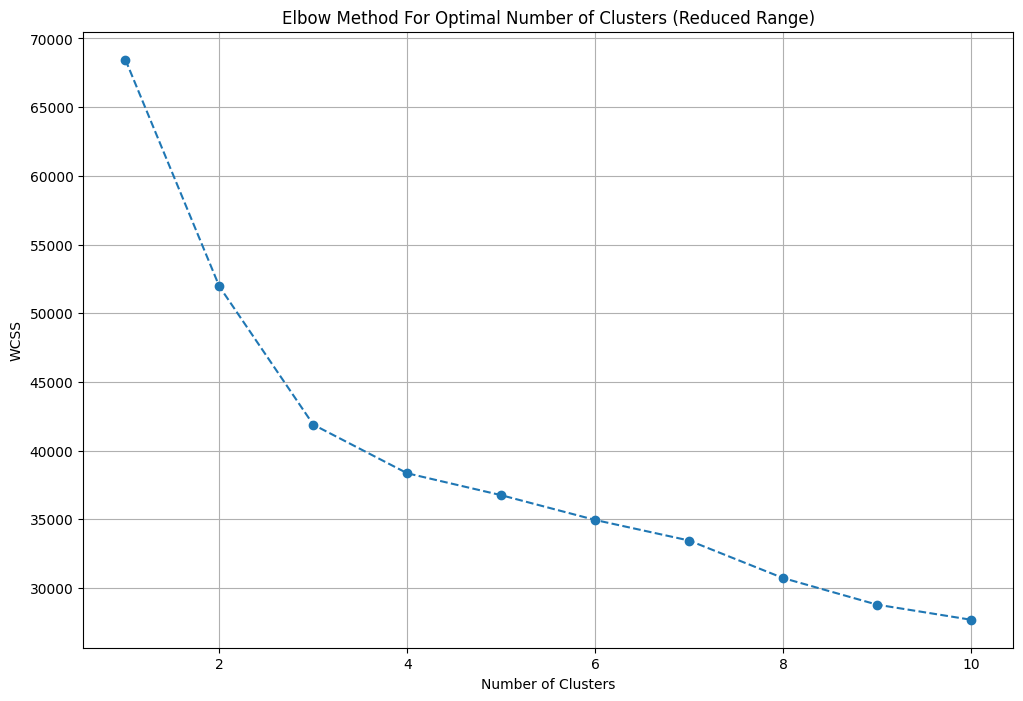

In [236]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [237]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)
cluster_assignments

array([1, 1, 1, ..., 2, 1, 2], dtype=int32)

In [238]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'additionalRoom',
       'floorNum', 'facing', 'agePossession', 'nearbyLocations',
       'furnishDetails', 'features', 'super_built_up_area', 'built_up_area',
       'carpet_area', 'study room', 'servant room', 'store room', 'pooja room',
       'others', 'Water Purifier', 'Modular Kitchen', 'Stove',
       'Washing Machine', 'Microwave', 'Curtains', 'Chimney', 'TV', 'Geyser',
       'Wardrobe', 'Light', 'Exhaust Fan', 'Sofa', 'AC', 'Dining Table', 'Fan',
       'Bed', 'Fridge'],
      dtype='object')

In [239]:
df = df.iloc[:,:-18]

In [240]:
df['furnishing_type'] = cluster_assignments

we can divide into 3 categories as
- 0 -> unfurnished
- 1 -> semifurnished
- 2 -> furnished

In [241]:
df.sample(5)[['furnishDetails','furnishing_type']]

,furnishDetails,furnishing_type
3206,[],1
745,NaN,1
662,NaN,1
974,"['1 Wardrobe', '1 Water Purifier', '12 Fan', '1 Exhaust Fan', '10 Geyser', '1 Microwave', '41 Light', '10 AC', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Modular Kitchen', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine']",2
3712,"['3 Wardrobe', '5 Fan', '5 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",1


## 5.features

In [242]:
df[['features']].sample(5)

,features
3170,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Shopping Centre']"
3545,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
52,NaN
1366,"['Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']"
2529,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Park', 'Visitor Parking']"


In [243]:
df['features'].isnull().sum()

np.int64(635)

We have apartment data which consists of amenities on the basis of society name, we can use that data and fill the above null values

In [244]:
df[['society','features']].sample(5)

,society,features
676,unitech aspen greens,"['Maintenance Staff', 'Water Storage', 'No open drainage around', 'Visitor Parking', 'Security Personnel']"
384,shree vardhman victoria,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
1069,raheja the vedaanta floors,NaN
1199,ireo skyon,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
2826,m3m golfestate,"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Maintenance Staff', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"


In [245]:
import pandas as pd
app_df = pd.read_csv('appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [246]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [247]:
temp_df = df[df['features'].isnull()]
temp_df.shape

(635, 26)

In [248]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [249]:
x

,TopFacilities
0,NaN
1,"['Swimming Pool', 'School', 'ATM', 'Aerobics Centre', 'Restaurant', 'Skating Rink', 'Theatre', 'Wi-Fi Connectivity', 'Pool Table']"
2,"['Mini Theatre', 'Foosball', 'Swimming Pool', 'Flower Garden', 'Salon', 'ATM', 'Card Room', 'Piped Gas', 'Grocery Shop']"
3,NaN
4,NaN
5,"['Bus Shelter', 'Infinity Pool', 'Swimming Pool', 'Bar/Chill-Out Lounge', 'Reflexology Park', 'Aerobics Centre', 'Restaurant', 'Terrace Garden', 'High Speed Elevators']"
6,NaN
7,"['Swimming Pool', 'Lounge', 'Aerobics Centre', 'Terrace Garden', 'Piped Gas', 'Squash Court', 'Gazebo', 'Wi-Fi Connectivity', 'Sun Deck']"
8,NaN
9,NaN


In [250]:
df.loc[temp_df.index,'features'] = x.values

In [251]:
df['features'].isnull().sum()

np.int64(481)

### Here, I have take all unique features and create single columns and then apply kmeans to get the optimum columns(or category) out of all columns. Similar to what we have done for amenities

In [252]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [253]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

In [254]:
df['features_list']

Output hidden; open in https://colab.research.google.com to view.

In [255]:
# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)
features_binary_df.head(3)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [256]:
features_binary_df.shape # 130 unique values

(3803, 130)

In [257]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

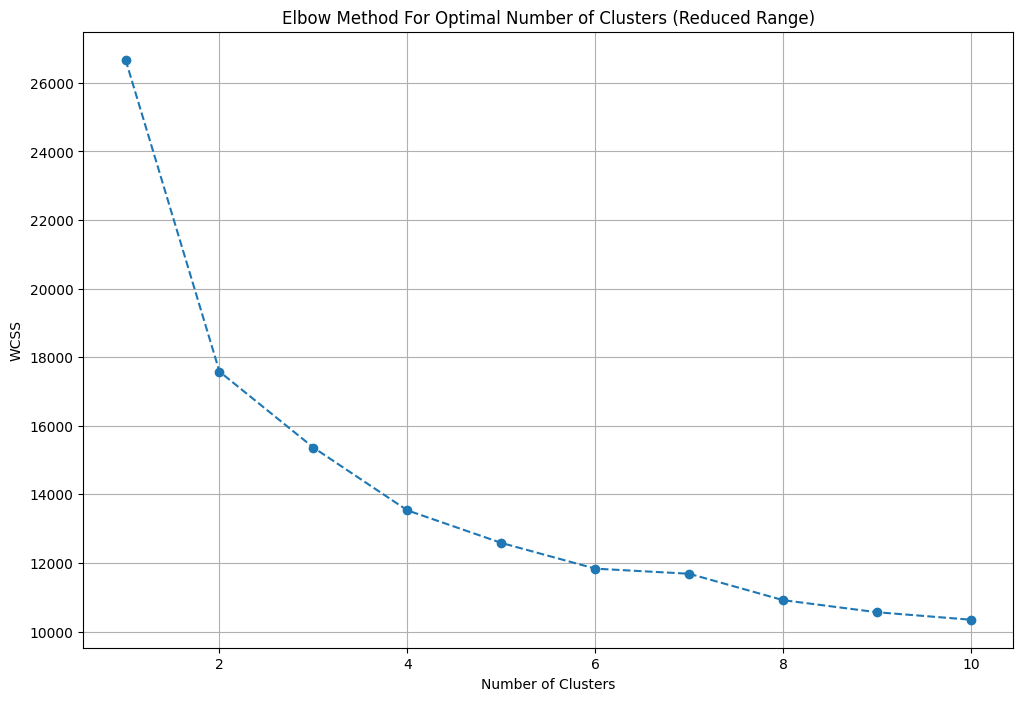

In [258]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [259]:
n_clusters = 2

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(features_binary_df)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(features_binary_df)
cluster_assignments

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

In [260]:
features_binary_df['new'] = cluster_assignments

In [261]:
features_binary_df.sample(10)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area,new
2761,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2795,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1
686,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1
2976,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
301,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0,1
2961,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
719,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3311,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

### Observations:
This way we didn't get satisfactory result. it divides into 2 category (high and low class)
- High class contain most of the features
- low class common features or no features (most of the values are None )

### So,we used different approache
 Here we have assigned the weight for each feature as provided and Assigning weights based on perceived luxury contribution

In [262]:
# here i have used chatgpt to provide luxury score to these features out of 10 also made some changes
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}


In [263]:
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [264]:
df['luxury_score'] = luxury_score

In [265]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet area: 650 sq.ft. (60.39 sq.m.),3,2,2,not available,2.0,NaN,New Property,"['Sector 55-56 Metro Station', 'The Leaf Mall Sohna', 'Omaxe Gurgaon Mall', 'Badshahpur Sohna Rd Hwy', 'Vidya Niketan School', 'KIIT College of Engg', 'Scottish High International School', 'Rawal Institutions', 'Park Hospital', 'Indira Gandhi Intl Airport', 'Spaze Business Park', 'DLF Cyber City']",NaN,"['Lift(s)', 'Park']",1081.0,NaN,650.0,0,0,0,0,0,1,"[Lift(s), Park]",8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,"study room,servant room",4.0,NaN,New Property,"['Sant Soordas Sihi Metro Station', 'Airia Mall', 'Dwarka Expressway', 'Pataudi Road', 'NH-8', 'KMP Expressway', 'RPS International School', 'Genesis Hospital Sector 84', 'Gurgaon Railway Station', 'Vatika Business Park Sector 49', 'Holiday Inn Gurugram Sector 90', 'De Adventure Amusement Park', 'National Tennis Academy Sector 98', 'IMT Manesar']",NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Piped-gas', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,NaN,1103.0,1,1,0,0,0,1,"[Power Back-up, Intercom Facility, Lift(s), Swimming Pool, Park, Piped-gas, Internet/wi-fi connectivity, Fitness Centre / GYM, Club house / Community Center]",38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,not available,0.0,NaN,Under Construction,"['V3S Sapphire Ninety Mall', 'Sector 86 Road', 'Dwarka Expy', 'RPS International School', 'SGT University', 'Shree Radhey Hospital And Trauma Center', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction']",[],"['Intercom Facility', 'Lift(s)', 'Park']",NaN,NaN,58141.0,0,0,0,0,0,1,"[Intercom Facility, Lift(s), Park]",15
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 585 sq.ft. (54.35 sq.m.),2,2,1,not available,17.0,NaN,New Property,"['Huda City Centre', 'Omaxe City Centre', 'Ninex City Mart', 'Vaels Ravindra Bharathi Global School', 'Anjali nursery', 'Polaris Hospital', 'Axis Bank', 'Triangular Park', 'Flow Sports Life Badminton Club', 'Basai Dhankot Railway Station', 'Cars24', 'Radisson Hotel Gurugram', ""McDonald's"", 'Petrol Pump', 'Indian Post Office']",[],"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",NaN,1000.0,585.0,0,0,0,0,0,1,"[Feng Shui / Vaastu Compliant, Security / Fire Alarm, Intercom Facility, Lift(s), Maintenance Staff, Water Storage, Park, Visitor Parking]",49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up area: 1615 sq.ft. (150.04 sq.m.)Carpet area: 1476 sq.ft. (137.12 sq.m.),3,4,3+,"servant room,others",10.0,North-West,Relatively New,"['Sapphire 93 Mall', 'Dwarka Expressway', 'NH-8, Imt Manesar', 'Western Peripheral Expressway', 'RPS International School Sector 89', 'DPG Institute of Technology', 'Aarvy Healthcare Hospital', 'Indira Gandhi International Airport', 'Holiday Inn Sector 90', 'De Adventure Park', 'National Tennis Academy Sector 98']","['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '3 Geyser', '15 Light', '5 AC', '1 Chimney', '4 Curtains', '1 Modular Kitchen', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'L

### cols to drop:
1. nearbyLocations
2. furnishDetails
3. features
4. features_list
5. additionalRoom

In [266]:
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [267]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
708,flat,ramsons kshitij,sector 95,0.33,3911.0,844.0,Super Built up area 767(71.26 sq.m.),2,2,1,14.0,South,New Property,767.0,NaN,NaN,0,0,0,0,1,2,79
1384,house,independent,sector 3,0.80,8155.0,981.0,Plot area 109(91.14 sq.m.),5,4,1,2.0,NaN,Moderately Old,NaN,981.0,NaN,0,0,0,0,0,1,0
523,house,international city by sobha phase 2,sector 109,6.20,25514.0,2430.0,Plot area 270(225.75 sq.m.),5,5,2,2.0,South-West,Relatively New,NaN,2430.0,NaN,0,1,0,0,0,1,135
190,flat,vatika city,sector 49,1.69,8622.0,1960.0,Carpet area: 1960 (182.09 sq.m.),3,3,3,3.0,North,Moderately Old,NaN,NaN,1960.0,0,0,0,1,0,1,136
3568,flat,corona gracieux,sector 76,1.08,5510.0,1960.0,Super Built up area 1960(182.09 sq.m.),3,3,3,1.0,NaN,New Property,1960.0,NaN,NaN,0,1,0,0,0,1,58


In [268]:
df.shape

(3803, 23)

In [269]:
df.to_csv('gurgaon_properties_cleaned_and_feature_engineering.csv',index=False)